In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from __future__ import print_function, division
import time

In [32]:
# Here are the libraries I am using
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import path
import json
import csv
import twitter
from datetime import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler

In [33]:
t0 = time.time()
df_o= pd.read_csv('out+gephi+senti.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))

0.05 secs ==> pd.read_csv


In [34]:
#remove all the rows that contain a missing value
df = df_o.dropna()

In [35]:
#Stratified sampling method by the value of Stance
def split_to_train_test(df, label_column, frac=0.7):
    train_df, val_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=frac)
        lbl_val_df = lbl_df.drop(lbl_train_df.index)
        print ('\n%s:\n----\ntotal:%d\ntrain_df:%d\nval_df:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_val_df)))
        train_df = train_df.append(lbl_train_df)
        val_df = val_df.append(lbl_val_df)

    return train_df, val_df


In [36]:
print('After staratified sampling, get two sets: training subset and validation subset')
train, val = split_to_train_test(df, 'eleted', 0.7)

After staratified sampling, get two sets: training subset and validation subset

0:
----
total:1205
train_df:844
val_df:361

1:
----
total:410
train_df:287
val_df:123


In [37]:
def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()
features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)

In [38]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_val, clf.predict(X_val))
print("MSE: %.4f" % mse)

MSE: 0.1212


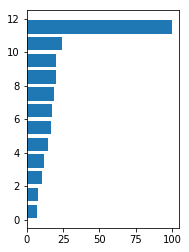

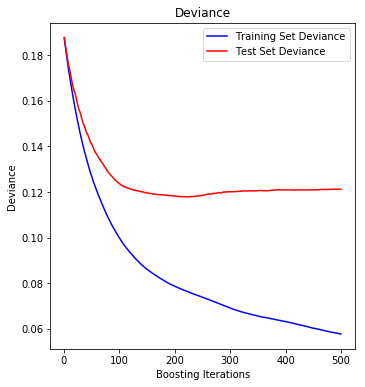

In [39]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_val)):
    test_score[i] = clf.loss_(y_val, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

In [42]:

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

/Users/wanghan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: only integer scalar arrays can be converted to a scalar index